<a href="https://colab.research.google.com/github/Alfonso-Garibay/computer-vision-course-Equipo-15/blob/main/1_basic_operations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Simple Image Operations

## Table of Contents
1. [Libraries](#libraries)
2. [Loading Images](#loading)
3. [Resizing Images](#resize)
4. [Negative Images](#negative)
5. [Logarithmic Transformation](#log)
6. [Image Binarizer](#bin)
7. [Image Quantizer](#quant)

## Importing Libraries <a class="anchor" id="libraries" ></a>

In [62]:
from matplotlib import image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import cv2
from skimage.transform import resize

## Loading Images <a class="anchor" id="loading"></a>

<class 'numpy.ndarray'>


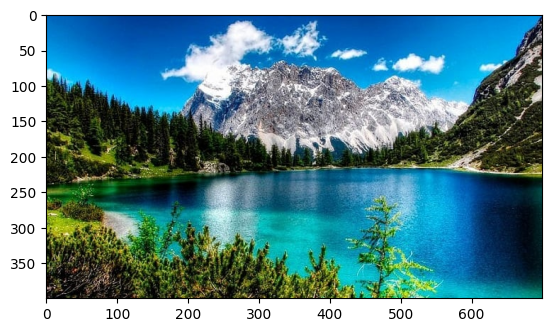

In [ ]:
img1 = mpimg.imread('/content/computer-vision-course-Equipo-15/data/image.jpg')
plt.imshow(img1)
print(type(img1))

Look at the shape of this array:

In [ ]:
img1.shape

(400, 700, 3)

The image is actually composed of three "layers, or *channels*, for red, green, and blue (RGB) pixel intensities.

Display the same image but this time we'll use another popular Python library for working with images - **cv2**.

numpy.ndarray

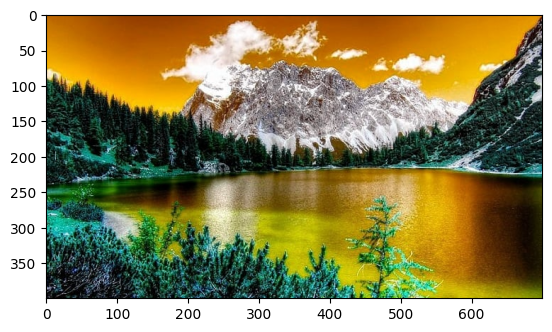

In [ ]:
img2 = cv2.imread('/content/computer-vision-course-Equipo-15/data/image.jpg')
plt.imshow(img2)
type(img2)

The trouble is that cv2 loads the array of image data with the channels ordered as blue, green, red (BGR) instead of red, green blue (RGB).

Let's fix that

AxesImage(size=(400, 700))


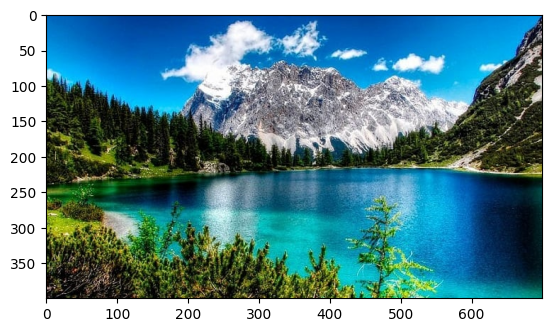

In [ ]:
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
print(plt.imshow(img2))

Lastly, one more commonly used library for image processing in Python we should consider - **PIL**:

<class 'PIL.JpegImagePlugin.JpegImageFile'>


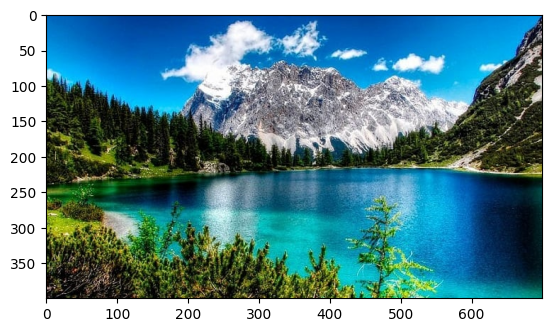

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

img3 = Image.open('/content/computer-vision-course-Equipo-15/data/image.jpg')
plt.imshow(img3)
print(type(img3))

It's easy to convert a PIL JpegImageFile to a numpy array

In [ ]:
img3 = np.array(img3)
img3.shape

(400, 700, 3)

Saving a numpy array in an optimized format, should you need to persist images into storage

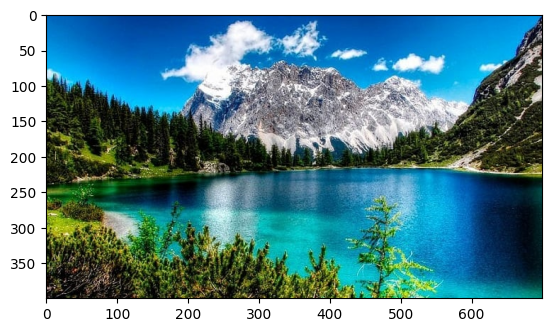

In [ ]:
# Save the image
np.save('/content/computer-vision-course-Equipo-15/data/img.npy', img3)

# Load the image
img3 = np.load('/content/computer-vision-course-Equipo-15/data/img.npy')

plt.imshow(img3)

## Resizing an Image <a class="anchor" id="resize"></a>
One of the most common manipulations of an image is to resize it.

Generally, we want to ensure that all of your training images have consistent dimensions.

Original size: 700 x 400
New size: 200 x 200


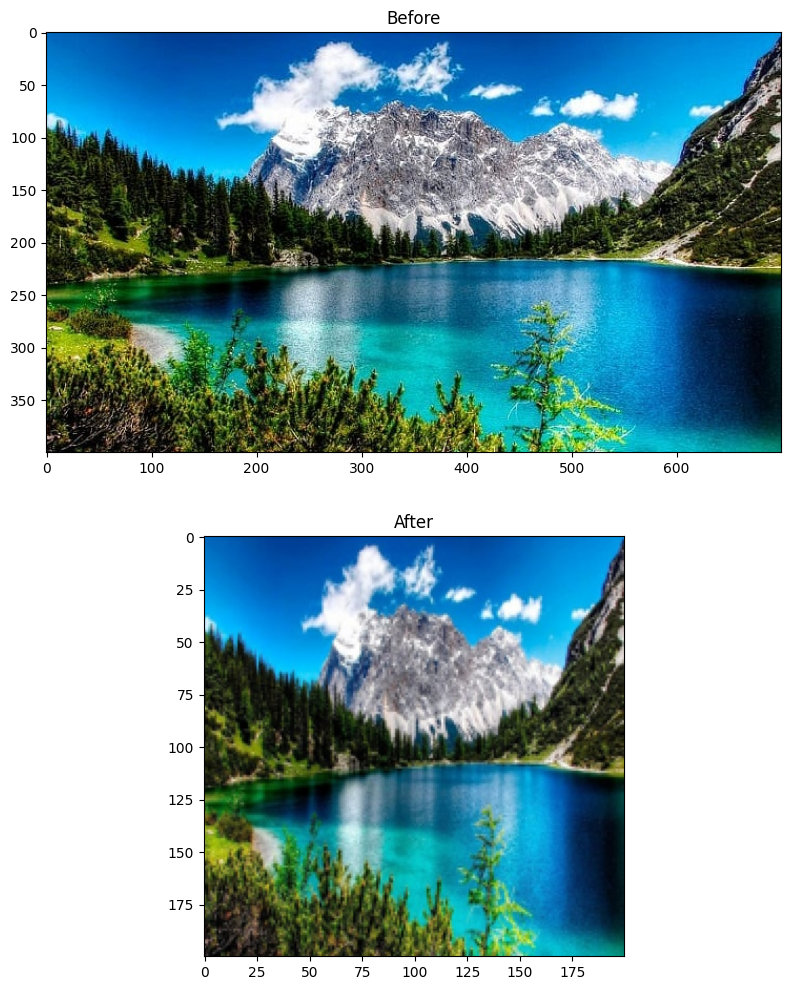

In [ ]:
from PIL import Image, ImageOps

# Load the image array into a PIL Image
orig_img = Image.fromarray(img3)

# Get the image size
o_h, o_w = orig_img.size
print('Original size:', o_h, 'x', o_w)

# We'll resize this so it's 200 x 200
target_size = (200,200)
new_img = orig_img.resize(target_size)
n_h, n_w = new_img.size
print('New size:', n_h, 'x', n_w)

# Show the original and resized images
# Create a figure
fig = plt.figure(figsize=(12, 12))

# Subplot for original image
a=fig.add_subplot(2,1,1)
imgplot = plt.imshow(orig_img)
a.set_title('Before')

# Subplot for resized image
a=fig.add_subplot(2,1,2)
imgplot = plt.imshow(new_img)
a.set_title('After')

plt.show()


If we want to resize the image and change its shape without distorting it, we'll need to *scale* the image so that its largest dimension fits our new desired size.

In [ ]:
# Get the image size
orig_height, orig_width = orig_img.size
print('Original size:', orig_height, 'x', orig_width)

# We'll resize this so it's 200 x 200
target_size = (200,200)

# Scale the image to the new size using the thumbnail method
scaled_img = orig_img
scaled_img.thumbnail(target_size, Image.ANTIALIAS)
scaled_height, scaled_width = scaled_img.size
print('Scaled size:', scaled_height, 'x', scaled_width)

# Create a new white image of the target size to be the background
new_img = Image.new("RGB", target_size, (255, 255, 255))

# paste the scaled image into the center of the white background image
new_img.paste(scaled_img, (int((target_size[0] - scaled_img.size[0]) / 2), int((target_size[1] - scaled_img.size[1]) / 2)))
new_height, new_width = new_img.size
print('New size:', new_height, 'x', new_width)

# Show the original and resized images
# Create a figure
fig = plt.figure(figsize=(12, 12))

# Subplot for original image
a=fig.add_subplot(3,1,1)
imgplot = plt.imshow(orig_img)
a.set_title('Original')

# Subplot for scaled image
a=fig.add_subplot(3,1,2)
imgplot = plt.imshow(scaled_img)
a.set_title('Scaled')

# Subplot for resized image
a=fig.add_subplot(3,1,3)
imgplot = plt.imshow(new_img)
a.set_title('Resized')

plt.show()

Original size: 700 x 400
Scaled size: 200 x 114
New size: 200 x 200


<ipython-input-26-7d254277b796>:10: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  scaled_img.thumbnail(target_size, Image.ANTIALIAS)


## Negative Images <a class="anchor" id="negative"></a>

In [ ]:
orig_img = cv2.imread('/content/computer-vision-course-Equipo-15/data/image.jpg')
orig_img = cv2.cvtColor(orig_img, cv2.COLOR_BGR2RGB)
img_neg = 255 - orig_img

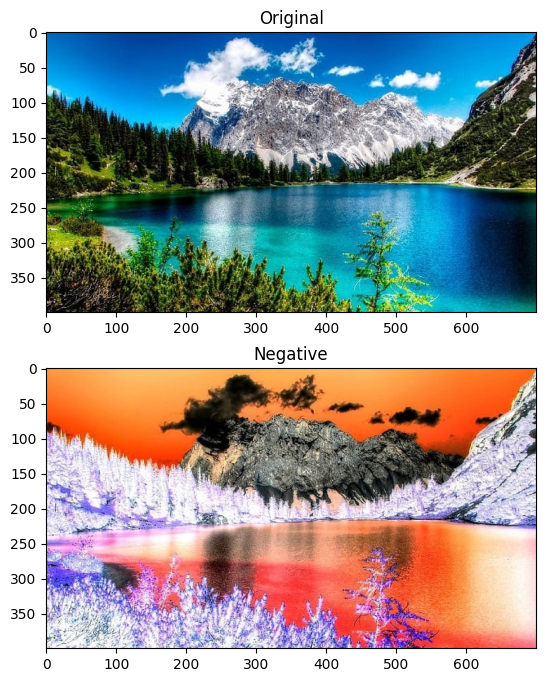

In [ ]:
fig = plt.figure(figsize=(8, 8))

# Subplot for original image
a=fig.add_subplot(2,1,1)
imgplot = plt.imshow(orig_img)
a.set_title('Original')

a = fig.add_subplot(2,1,2)
imgplot = plt.imshow(img_neg)
a.set_title('Negative')

plt.show()

## Logarithmic Transformation <a class="anchor" id="log"></a>

$$
S = c * log (1 + r)
$$

where,
- $R$ = input pixel value
- $C$ = scaling constant and
- $S$ = output pixel value

The value of $c$ is chosen such that we get the maximum output value corresponding to the bit size used. So, the formula for calculating $c$  is as follows:

$c = 255 / (log (1 + $ max input pixel value $))$

In [ ]:
orig_img = cv2.imread('/content/computer-vision-course-Equipo-15/data/image.jpg')
orig_img = cv2.cvtColor(orig_img, cv2.COLOR_BGR2RGB)

# Apply log transformation method
c = 255 / np.log(1 + np.max(orig_img))
log_img = c * (np.log(orig_img + 1))

# Specify the data type so that
# float value will be converted to int
log_img = np.array(log_img, dtype = np.uint8)

<ipython-input-29-873627d15f3e>:6: RuntimeWarning: divide by zero encountered in log
  log_img = c * (np.log(orig_img + 1))


Log transformation of gives actual information by enhancing the image. If we apply this method in an image having higher pixel values then it will enhance the image more and actual information of the image will be lost.

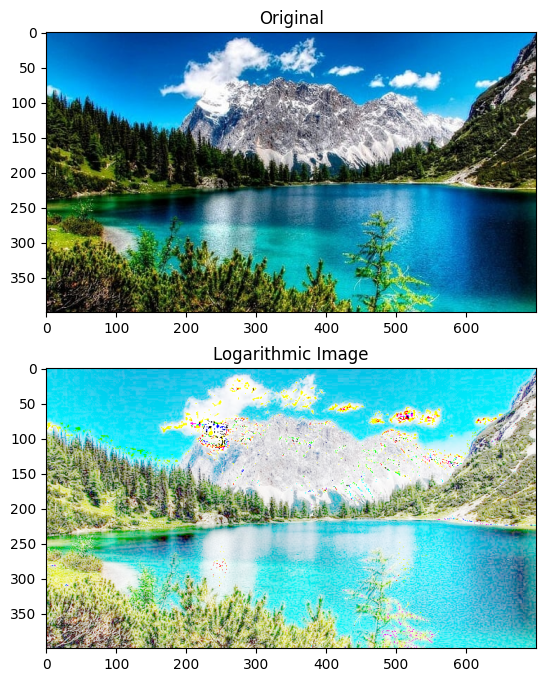

In [ ]:
fig = plt.figure(figsize=(8, 8))

# Subplot for original image
a=fig.add_subplot(2,1,1)
imgplot = plt.imshow(orig_img)
a.set_title('Original')

a = fig.add_subplot(2,1,2)
imgplot = plt.imshow(log_img)
a.set_title('Logarithmic Image')

plt.show()

## Image Binarizer (Thresholding) <a class="anchor" id="bin"></a>

Binarize pixels (set pixel values to 0 or 1) according to a threshold.

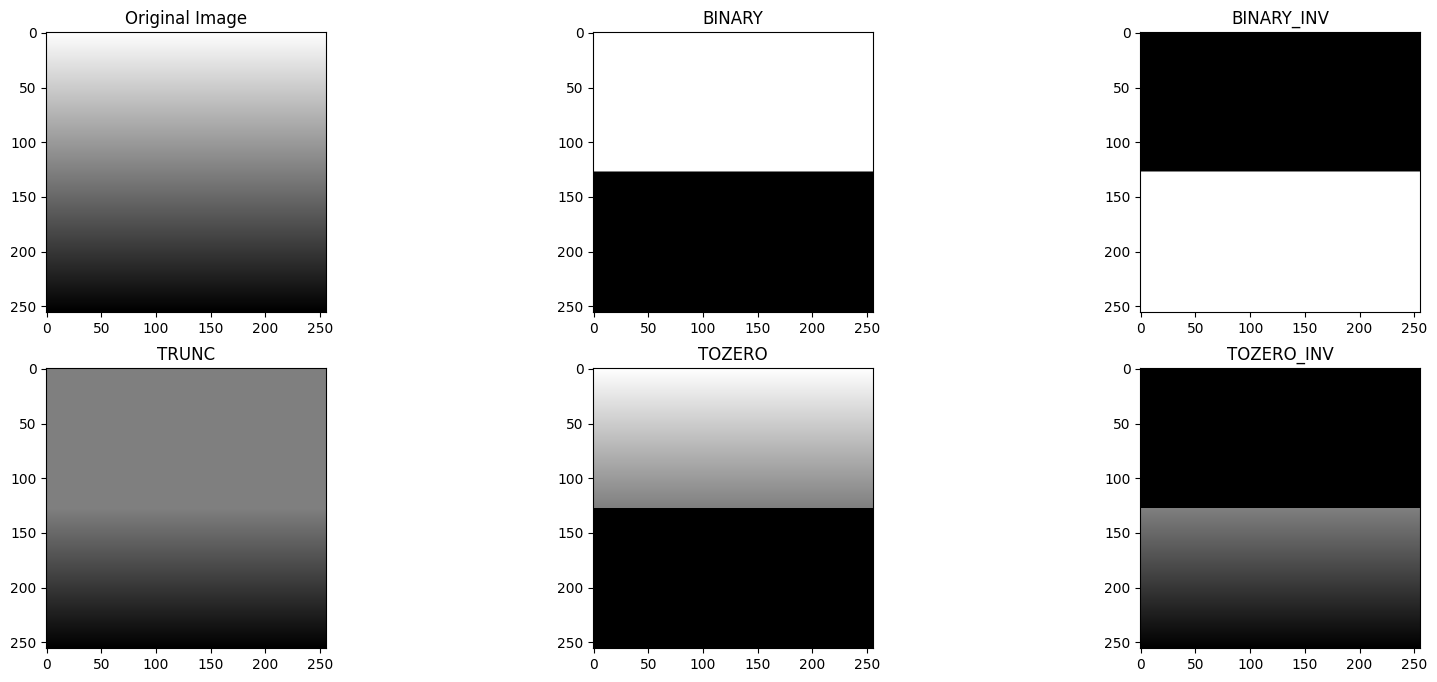

In [ ]:
orig_img = cv2.imread('/content/computer-vision-course-Equipo-15/data/linear_gradient.png')
orig_img = cv2.cvtColor(orig_img, cv2.COLOR_BGR2RGB)

ret,thresh1 = cv2.threshold(orig_img,127,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(orig_img,127,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(orig_img,127,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(orig_img,127,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(orig_img,127,255,cv2.THRESH_TOZERO_INV)

titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [orig_img, thresh1, thresh2, thresh3, thresh4, thresh5]
n = np.arange(6)

fig = plt.figure(figsize=(20, 8))
for i in n:
  plt.subplot(2,3,i+1), plt.imshow(images[i],'gray')
  plt.title(titles[i])

plt.show()

## Image Quantizer  <a class="anchor" id="quant"></a>

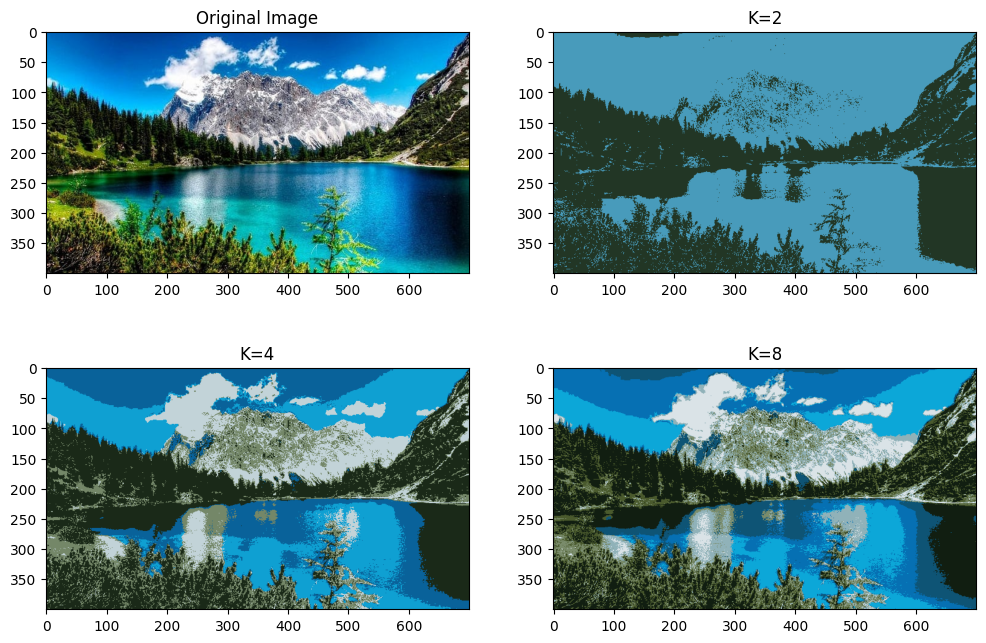

In [ ]:
orig_img = cv2.imread('/content/computer-vision-course-Equipo-15/data/image.jpg')

Z = orig_img.reshape((-1,3))

# convert to np.float32
Z = np.float32(Z)

# define criteria, number of clusters(K) and apply kmeans()
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
def colorQuant(Z, K, criteria):

   ret,label,center=cv2.kmeans(Z,K,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)

   # Now convert back into uint8, and make original image
   center = np.uint8(center)
   res = center[label.flatten()]
   res2 = res.reshape((orig_img.shape))
   return res2
res1 = colorQuant(Z, 2, criteria)
res2 = colorQuant(Z, 5, criteria)
res3 = colorQuant(Z, 8, criteria)

fig = plt.figure(figsize=(12, 8))

plt.subplot(221),plt.imshow(cv2.cvtColor(orig_img, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(222),plt.imshow(cv2.cvtColor(res1, cv2.COLOR_BGR2RGB))
plt.title('K=2')

plt.subplot(223),plt.imshow(cv2.cvtColor(res2, cv2.COLOR_BGR2RGB))
plt.title('K=4')

plt.subplot(224),plt.imshow(cv2.cvtColor(res3, cv2.COLOR_BGR2RGB))
plt.title('K=8')

plt.show()

**1.- Las transformaciones pixel a pixel son sumamente utilizadas para aumentar la cantidad de imágenes para entrenar modelos de inteligencia artificial, sobre todo aquellas de tipo fotométrico. Investiga 3 tipos de transformaciones y aplicarlas en el proyecto de Google Collab sobre imágenes propias.**

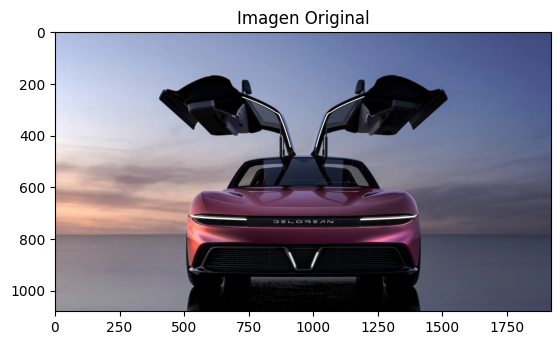

In [40]:
# Cargar la imagen
img_path = '/content/computer-vision-course-Equipo-15/data/car.jpg'
img = mpimg.imread(img_path)

# Mostrar la imagen original
plt.imshow(img)
plt.title('Imagen Original')
plt.show()

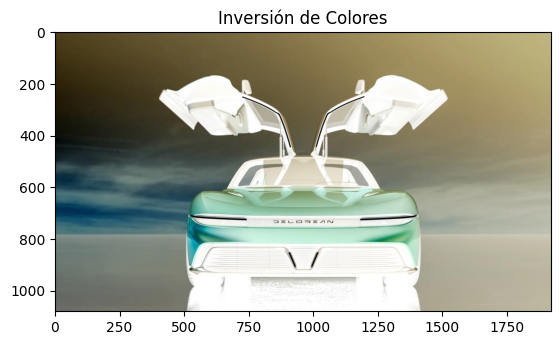

In [41]:
# 1. Inversión de Colores
color_inverted_img = 255 - img

# Mostrar la imagen con inversión de colores
plt.imshow(color_inverted_img)
plt.title('Inversión de Colores')
plt.show()

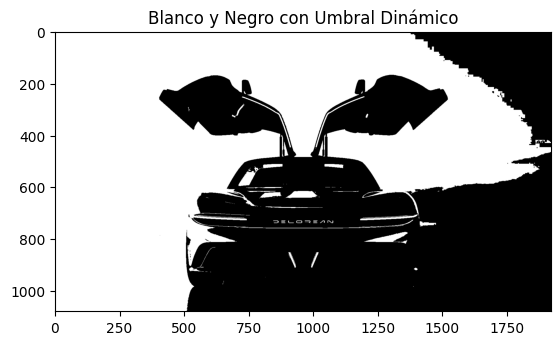

In [42]:
# 2. Blanco y Negro con Umbral Dinámico
gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
_, thresholded_img = cv2.threshold(gray_img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Crear una imagen en color con umbral dinámico
thresholded_img_colored = cv2.cvtColor(thresholded_img, cv2.COLOR_GRAY2RGB)

# Mostrar la imagen en blanco y negro con umbral dinámico
plt.imshow(thresholded_img_colored)
plt.title('Blanco y Negro con Umbral Dinámico')
plt.show()

In [43]:
# 3. Filtro Sepia
def apply_sepia(img):
    sepia_filter = np.array([[0.393, 0.769, 0.189],
                             [0.349, 0.686, 0.168],
                             [0.272, 0.534, 0.131]])
    sepia_img = cv2.transform(img, sepia_filter)
    sepia_img[np.where(sepia_img > 255)] = 255
    sepia_img = np.uint8(sepia_img)
    return sepia_img

sepia_img = apply_sepia(img)

# Mostrar la imagen con filtro sepia
plt.imshow(sepia_img)
plt.title('Filtro Sepia')
plt.show()

**2.- Investiga una aplicación donde obtener el negativo de imagen tenga un valor específico e integra el código en en una fila de google collab, justificar brevemente tu investigación y haciendo una demo sencilla.**

En el ámbito médico, la aplicación del negativo a las imágenes ha demostrado ser valiosa en ciertos contextos. Al invertir los colores de una imagen médica, como radiografías o imágenes de resonancia magnética, se pueden resaltar características que podrían pasar desapercibidas en la versión original. Este enfoque permite realzar detalles específicos y mejorar la visibilidad de ciertas estructuras, lo que puede ser crucial para la identificación de patologías o anomalías. La técnica de obtener el negativo con valor específico puede ofrecer a los doctores una herramienta adicional para el análisis detallado de imágenes médicas, mejorando así la interpretación y diagnóstico de condiciones clínicas.

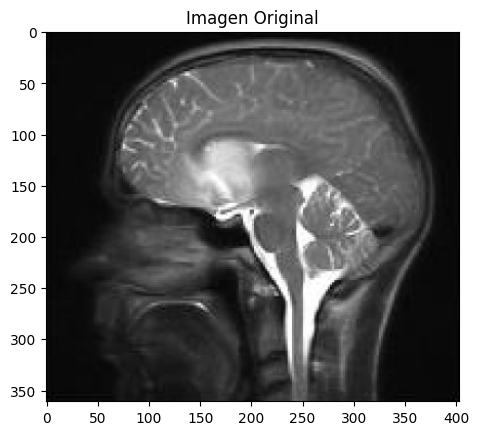

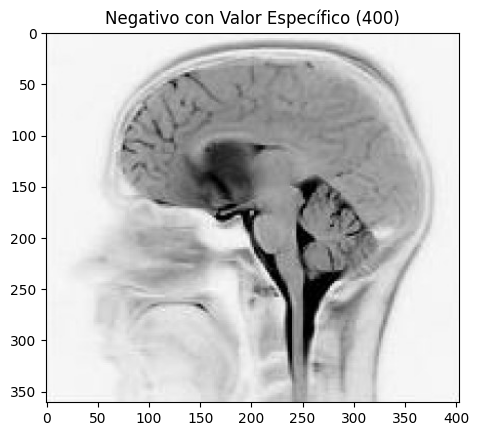

In [50]:
# Cargar la imagen médica
img_path = '/content/computer-vision-course-Equipo-15/data/medical.jpg'
img = mpimg.imread(img_path)

# Mostrar la imagen original
plt.imshow(img, cmap='gray')
plt.title('Imagen Original')
plt.show()

# Especificar el valor específico para el negativo
specific_value = 400

# Obtener el negativo de la imagen con el valor específico
neg_img = 255 - img

# Ajustar el valor específico
neg_img[neg_img > specific_value] = specific_value

# Mostrar la imagen con el negativo y el valor específico
plt.imshow(neg_img, cmap='gray')
plt.title(f'Negativo con Valor Específico ({specific_value})')
plt.show()

**3.- Investiga una aplicación donde se puede aplicar la corrección de gamma en una imagen. Integra el código en en una fila de google collab, justifica brevemente tu investigación y haz una demo sencilla.**


Investigamos que la aplicación de corrección de gamma en videojuegos resulta beneficiosa para ajustar la iluminación y el contraste de las escenas. Esta técnica proporciona a los diseñadores de juegos la capacidad de mejorar la calidad visual al modificar la respuesta luminosa de la pantalla. Al ajustar el valor gamma, se puede lograr una representación más realista de la iluminación en entornos virtuales, permitiendo resaltar detalles en áreas oscuras y brillantes de manera más efectiva. Esto puede mejorar la jugabilidad y la experiencia del usuario al crear un ambiente más inmersivo y detallado en los videojuegos.

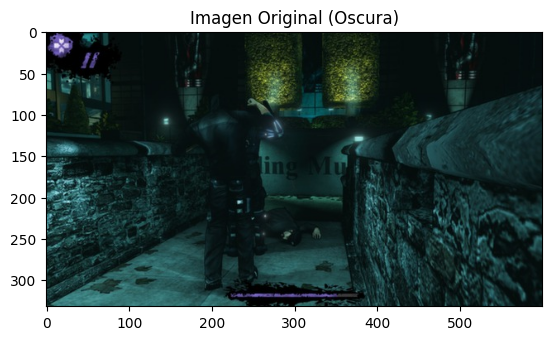

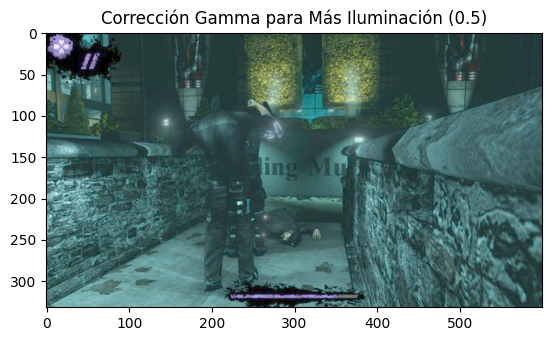

In [56]:
# Cargar imagen de video juego
img_path = '/content/computer-vision-course-Equipo-15/data/gaming.jpg'
img = mpimg.imread(img_path)

# Mostrar la imagen original
plt.imshow(img)
plt.title('Imagen Original (Oscura)')
plt.show()

# Parámetro de corrección gamma para aumentar la iluminación
gamma_value = 0.5

# Aplicar corrección gamma para aumentar la iluminación
gamma_corrected_img = np.power(img, gamma_value)

# Normalizar los valores para mantener la escala de color
gamma_corrected_img = gamma_corrected_img / np.max(gamma_corrected_img)

# Mostrar la imagen con más iluminación después de la corrección gamma
plt.imshow(gamma_corrected_img)
plt.title(f'Corrección Gamma para Más Iluminación ({gamma_value})')
plt.show()

**4.- Investiga una aplicación donde se puede usar la sustracción de imágenes e integra el código en en una fila de google collab, justificar brevemente tu investigación, haciendo una demo sencilla.**